In [1]:
#import module
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#assign csv to dataframe
data = pd.read_csv("old_cars.csv")

In [3]:
#making mpg in to two increments
bins = range(8, 47, 2)

#format output of mpg value
labels = [f"{i}" for i in bins[:-1]]

#assign increments MPG value 
data['MPG_discrete'] = pd.cut(data['MPG'], bins=bins, labels=labels)

In [4]:
#making of y axis, group origin and MPG discrete 
grouped_data = data.groupby(['Origin', 'MPG_discrete']).size().reset_index(name='count') #size used to count data amount, reset_index is function to return group result to dataframe and named it

In [5]:
#reorganized the grouped data to show the distribution of mileage across each origin
pivoted_data = grouped_data.pivot(index='MPG_discrete', columns='Origin', values='count') #pivot used to turn dataframe to wide format by change origin column value into new column name then fill values on each column with total observation of origin and MPG_discrete

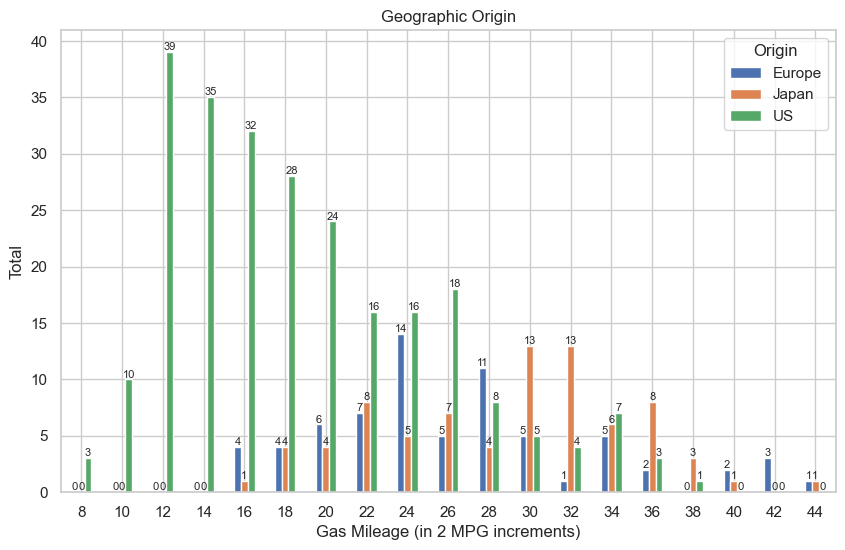

In [6]:
#background styling
sns.set(style="whitegrid")

#create a group vbar chart
ax = pivoted_data.plot(kind='bar', stacked=False, figsize=(10, 6))

#add data labels
for rect in ax.containers:
    ax.bar_label(rect, label_type='edge', fontsize=8, padding=0)
    
#assign title
plt.xlabel("Gas Mileage (in 2 MPG increments)")
plt.ylabel("Total")
plt.title("Geographic Origin")

#turn increments value to horizontal from vertical 
ax.set_xticklabels(labels, rotation=0)

#show plot
plt.show()

In [7]:
data = data[data['Model'].between(70, 82)]

In [8]:
#data grouping of origin and model then calculate mean of MPG for every category using agg method
grouped_data = data.groupby(['Origin', 'Model']).agg({'MPG': 'mean'}).reset_index() #agg is used to applicate one or more function to column or dataframe row, ex: mean, median, sum, max, and min

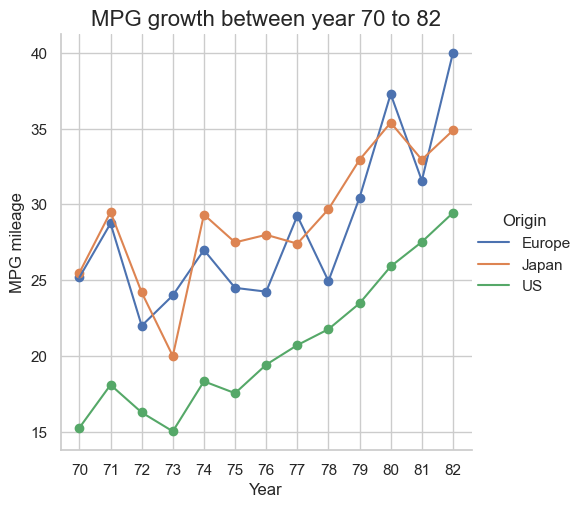

<Figure size 2000x1200 with 0 Axes>

In [13]:
#data plotting using linechart 
sns.relplot(data=grouped_data, x='Model', y='MPG', hue='Origin', kind='line', legend=True)

#set x-tick labels to be the same as the year values in the data
plt.xticks(grouped_data['Model'].unique())

#make data points that correspond to the annual average of the gas mileage for each origin
for origin, group in grouped_data.groupby('Origin'):
    plt.scatter(group['Model'], group['MPG'], label=origin)

#assign title,label for x and y axis
plt.title('MPG growth between year 70 to 82', fontsize=16)
plt.xlabel('Year')
plt.ylabel('MPG mileage')

# Set figure size
plt.figure(figsize=(20, 12))

#show plot
plt.show()

In [10]:
bins = range(70, 83, 1)
labels = [f"{i}" for i in bins[:-1]]
data['Year_group'] = pd.cut(data['Model'], bins=bins, labels=labels)

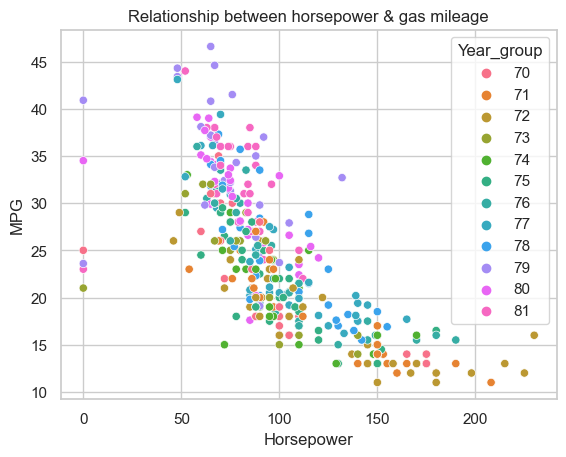

In [11]:
#make scatterplot 
sns.scatterplot(data=data, x='Horsepower', y='MPG', hue='Year_group', legend=True)

#assign title
plt.title("Relationship between horsepower & gas mileage")
plt.xlabel("Horsepower")
plt.ylabel("MPG")

#show plot
plt.show()

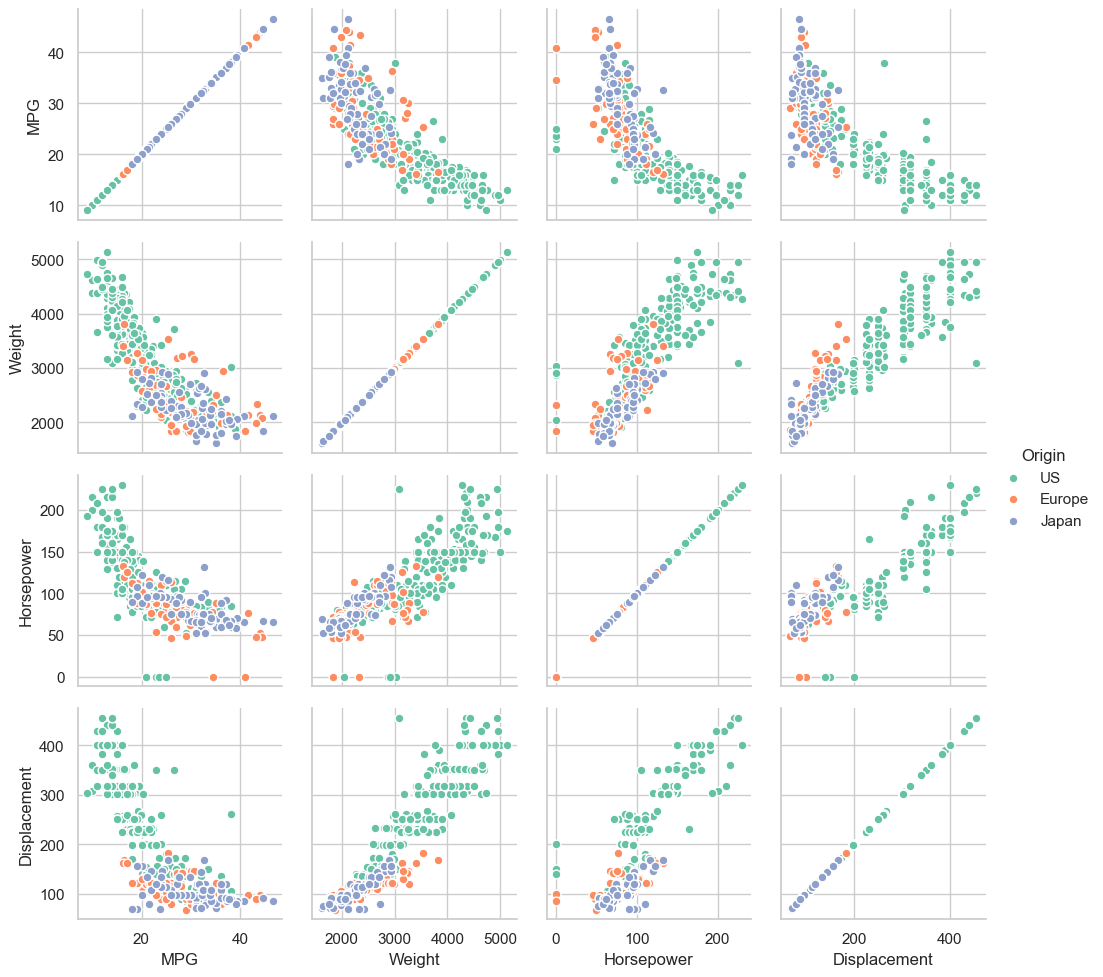

In [20]:
#background styling
sns.set_theme(style = "whitegrid")

#make matrix scatterplot
g = sns.PairGrid(data, vars = ['MPG', 'Weight', 'Horsepower', 'Displacement'], hue="Origin", palette="Set2") #vars used to include column used in plot
g = g.map(plt.scatter, linewidths=1, edgecolor="w", s=40)
g = g.add_legend()

plt.show()